# In this tutorial we'll see what to watch for during and after the network training

## Monitoring training health

First let's look at at the training history - we want to display the training set loss and vlidation set loss as a function of 'iteration' or the batch number seen by our model

In [1]:
import os,sys
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
from utils import plot_utils

In [3]:
%matplotlib inline

You will need to change the location of where these files are

In [4]:
loc="../model_state_dumps/20190730_072940"

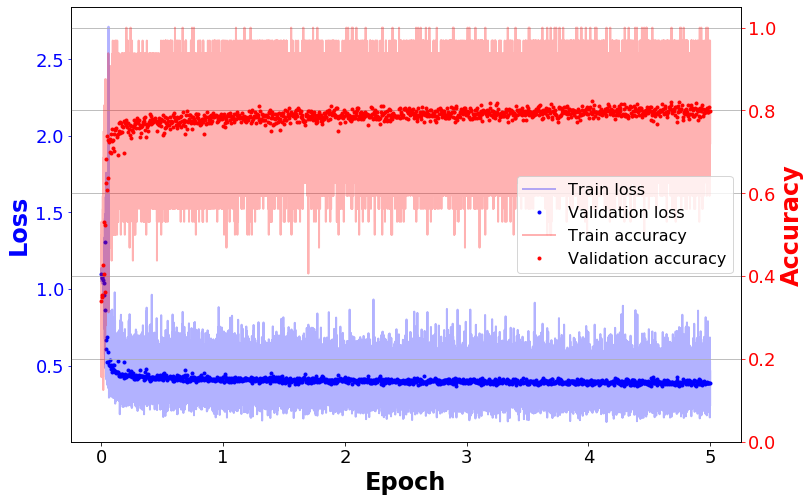

In [5]:
plot_utils.disp_learn_hist(loc)


Why so bumpy?
   - there is 'noise' associated with batch-to-batch variation BUT
   - The main effect is actually the real bumpiness in the loss landscape being traversed during learning
   
To learn anything we need to smooth out the plot - for instance by using moving average

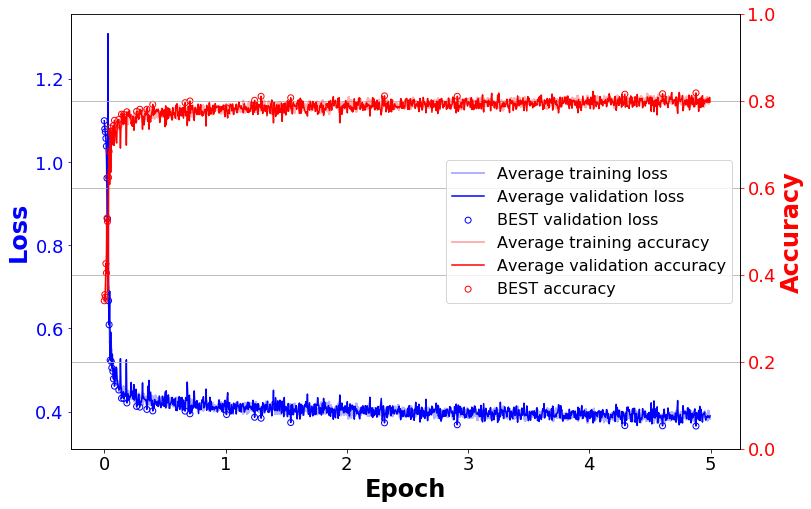

In [6]:
plot_utils.disp_learn_hist_smoothed(loc,window_train=200,window_val=1)

This actually looks pretty good - we get initially a very quick learning and then a plateau. Both training and validation loss is still decreasing slightly and tracking - which means we could probably kept on training

Let's run training on a small sample to illustrate overtraining

In [7]:
from models.simpleCNN import SimpleCNN
model_CNN=SimpleCNN(num_input_channels=38,num_classes=3)

In [8]:
from utils.data_handling import WCH5Dataset

In [9]:
import numpy as np
def rotate_chan(x):
    return np.transpose(x,(2,0,1))

In [10]:
dset=WCH5Dataset("/fast_scratch/TRISEP_data/NUPRISM.h5",reduced_dataset_size=20000,val_split=0.1,test_split=0.1,transform=rotate_chan)

Reduced size: 20000


In [11]:
class CONFIG:
    pass
config=CONFIG()
config.batch_size_test = 1024
config.batch_size_train = 32
config.batch_size_val = 1024
config.lr=0.001
config.device = 'gpu'
config.gpu_list = [0]
config.dump_path = '../model_state_dumps'
config.num_workers_train=3
config.num_workers_val=2
config.num_workers_test=2

In [12]:
from utils.engine import Engine

In [13]:
engine=Engine(model_CNN,dset,config)

Requesting a GPU
CUDA is available
Creating a directory for run dump: ../model_state_dumps/20190730_090735/


In [14]:
engine.train(epochs=20,report_interval=10,valid_interval=10)

Epoch 0 Starting @ 2019-07-30 08:47:31
... Iteration 0 ... Epoch 0.00 ... Validation Loss 1.101 ... Validation Accuracy 0.326
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
best validation loss so far!: 1.1012226343154907
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNNBEST.pth
... Iteration 1 ... Epoch 0.00 ... Loss 1.110 ... Accuracy 0.312
... Iteration 10 ... Epoch 0.02 ... Validation Loss 1.102 ... Validation Accuracy 0.303
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 11 ... Epoch 0.02 ... Loss 1.097 ... Accuracy 0.344
starting over on the validation set
... Iteration 20 ... Epoch 0.04 ... Validation Loss 1.100 ... Validation Accuracy 0.307
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
best validation loss so far!: 1.1004999876022339
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNNBEST.pth
... Iteration 21 ... Epoch 0.04 ... Loss 1.104 ... Accuracy 0.344

starting over on the validation set
... Iteration 260 ... Epoch 0.52 ... Validation Loss 1.074 ... Validation Accuracy 0.421
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
best validation loss so far!: 1.0744366645812988
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNNBEST.pth
... Iteration 261 ... Epoch 0.52 ... Loss 1.069 ... Accuracy 0.500
... Iteration 270 ... Epoch 0.54 ... Validation Loss 1.073 ... Validation Accuracy 0.393
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
best validation loss so far!: 1.0727121829986572
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNNBEST.pth
... Iteration 271 ... Epoch 0.54 ... Loss 1.064 ... Accuracy 0.469
starting over on the validation set
... Iteration 280 ... Epoch 0.56 ... Validation Loss 1.068 ... Validation Accuracy 0.401
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
best validation loss so far!: 1.0680797100067139
Saved checkp

starting over on the validation set
... Iteration 520 ... Epoch 1.04 ... Validation Loss 0.919 ... Validation Accuracy 0.642
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
best validation loss so far!: 0.9191822409629822
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNNBEST.pth
... Iteration 521 ... Epoch 1.04 ... Loss 0.903 ... Accuracy 0.625
... Iteration 530 ... Epoch 1.06 ... Validation Loss 0.915 ... Validation Accuracy 0.583
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
best validation loss so far!: 0.9152507185935974
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNNBEST.pth
... Iteration 531 ... Epoch 1.06 ... Loss 0.915 ... Accuracy 0.594
starting over on the validation set
... Iteration 540 ... Epoch 1.08 ... Validation Loss 0.955 ... Validation Accuracy 0.461
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 541 ... Epoch 1.08 ... Loss 0.915 ... Accuracy 

starting over on the validation set
... Iteration 780 ... Epoch 1.56 ... Validation Loss 0.584 ... Validation Accuracy 0.664
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
best validation loss so far!: 0.5836613774299622
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNNBEST.pth
... Iteration 781 ... Epoch 1.56 ... Loss 0.666 ... Accuracy 0.594
... Iteration 790 ... Epoch 1.58 ... Validation Loss 0.581 ... Validation Accuracy 0.686
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
best validation loss so far!: 0.5810549855232239
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNNBEST.pth
... Iteration 791 ... Epoch 1.58 ... Loss 0.671 ... Accuracy 0.531
starting over on the validation set
... Iteration 800 ... Epoch 1.60 ... Validation Loss 0.561 ... Validation Accuracy 0.678
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
best validation loss so far!: 0.5613223910331726
Saved checkp

... Iteration 1060 ... Epoch 2.12 ... Validation Loss 0.562 ... Validation Accuracy 0.702
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 1061 ... Epoch 2.12 ... Loss 0.646 ... Accuracy 0.562
... Iteration 1070 ... Epoch 2.14 ... Validation Loss 0.518 ... Validation Accuracy 0.715
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 1071 ... Epoch 2.14 ... Loss 0.440 ... Accuracy 0.781
starting over on the validation set
... Iteration 1080 ... Epoch 2.16 ... Validation Loss 0.508 ... Validation Accuracy 0.724
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 1081 ... Epoch 2.16 ... Loss 0.558 ... Accuracy 0.656
... Iteration 1090 ... Epoch 2.18 ... Validation Loss 0.497 ... Validation Accuracy 0.739
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
best validation loss so far!: 0.4966401159763336
Saved checkpoint as: ../model_state_dumps/20190730_084731/Simpl

... Iteration 1360 ... Epoch 2.72 ... Validation Loss 0.484 ... Validation Accuracy 0.729
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 1361 ... Epoch 2.72 ... Loss 0.466 ... Accuracy 0.781
... Iteration 1370 ... Epoch 2.74 ... Validation Loss 0.471 ... Validation Accuracy 0.748
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 1371 ... Epoch 2.74 ... Loss 0.399 ... Accuracy 0.812
starting over on the validation set
... Iteration 1380 ... Epoch 2.76 ... Validation Loss 0.457 ... Validation Accuracy 0.768
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 1381 ... Epoch 2.76 ... Loss 0.536 ... Accuracy 0.656
... Iteration 1390 ... Epoch 2.78 ... Validation Loss 0.468 ... Validation Accuracy 0.736
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 1391 ... Epoch 2.78 ... Loss 0.401 ... Accuracy 0.719
starting over on the validation set
... Iter

starting over on the validation set
... Iteration 1680 ... Epoch 3.36 ... Validation Loss 0.459 ... Validation Accuracy 0.746
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 1681 ... Epoch 3.36 ... Loss 0.526 ... Accuracy 0.719
... Iteration 1690 ... Epoch 3.38 ... Validation Loss 0.439 ... Validation Accuracy 0.769
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 1691 ... Epoch 3.38 ... Loss 0.424 ... Accuracy 0.750
starting over on the validation set
... Iteration 1700 ... Epoch 3.40 ... Validation Loss 0.430 ... Validation Accuracy 0.775
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
best validation loss so far!: 0.43031713366508484
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNNBEST.pth
... Iteration 1701 ... Epoch 3.40 ... Loss 0.420 ... Accuracy 0.844
... Iteration 1710 ... Epoch 3.42 ... Validation Loss 0.457 ... Validation Accuracy 0.752
Saved checkpoint as: .

starting over on the validation set
... Iteration 2000 ... Epoch 4.00 ... Validation Loss 0.447 ... Validation Accuracy 0.753
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 2001 ... Epoch 4.00 ... Loss 0.582 ... Accuracy 0.719
... Iteration 2010 ... Epoch 4.02 ... Validation Loss 0.445 ... Validation Accuracy 0.758
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 2011 ... Epoch 4.02 ... Loss 0.430 ... Accuracy 0.812
starting over on the validation set
... Iteration 2020 ... Epoch 4.04 ... Validation Loss 0.436 ... Validation Accuracy 0.762
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 2021 ... Epoch 4.04 ... Loss 0.499 ... Accuracy 0.625
... Iteration 2030 ... Epoch 4.06 ... Validation Loss 0.444 ... Validation Accuracy 0.761
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 2031 ... Epoch 4.06 ... Loss 0.566 ... Accuracy 0.719
starting

... Iteration 2320 ... Epoch 4.64 ... Validation Loss 0.442 ... Validation Accuracy 0.748
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 2321 ... Epoch 4.64 ... Loss 0.387 ... Accuracy 0.781
... Iteration 2330 ... Epoch 4.66 ... Validation Loss 0.430 ... Validation Accuracy 0.768
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 2331 ... Epoch 4.66 ... Loss 0.478 ... Accuracy 0.688
starting over on the validation set
... Iteration 2340 ... Epoch 4.68 ... Validation Loss 0.428 ... Validation Accuracy 0.759
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 2341 ... Epoch 4.68 ... Loss 0.467 ... Accuracy 0.750
... Iteration 2350 ... Epoch 4.70 ... Validation Loss 0.431 ... Validation Accuracy 0.773
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 2351 ... Epoch 4.70 ... Loss 0.436 ... Accuracy 0.750
starting over on the validation set
... Iter

starting over on the validation set
... Iteration 2660 ... Epoch 5.32 ... Validation Loss 0.488 ... Validation Accuracy 0.718
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 2661 ... Epoch 5.32 ... Loss 0.541 ... Accuracy 0.656
... Iteration 2670 ... Epoch 5.34 ... Validation Loss 0.433 ... Validation Accuracy 0.766
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 2671 ... Epoch 5.34 ... Loss 0.412 ... Accuracy 0.844
starting over on the validation set
... Iteration 2680 ... Epoch 5.36 ... Validation Loss 0.439 ... Validation Accuracy 0.748
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 2681 ... Epoch 5.36 ... Loss 0.549 ... Accuracy 0.625
... Iteration 2690 ... Epoch 5.38 ... Validation Loss 0.416 ... Validation Accuracy 0.787
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 2691 ... Epoch 5.38 ... Loss 0.398 ... Accuracy 0.781
starting

Epoch 6 Starting @ 2019-07-30 08:49:37
starting over on the validation set
... Iteration 3000 ... Epoch 6.00 ... Validation Loss 0.430 ... Validation Accuracy 0.766
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 3001 ... Epoch 6.00 ... Loss 0.409 ... Accuracy 0.781
... Iteration 3010 ... Epoch 6.02 ... Validation Loss 0.431 ... Validation Accuracy 0.760
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 3011 ... Epoch 6.02 ... Loss 0.441 ... Accuracy 0.750
starting over on the validation set
... Iteration 3020 ... Epoch 6.04 ... Validation Loss 0.443 ... Validation Accuracy 0.769
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 3021 ... Epoch 6.04 ... Loss 0.443 ... Accuracy 0.781
... Iteration 3030 ... Epoch 6.06 ... Validation Loss 0.460 ... Validation Accuracy 0.741
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 3031 ... Epoch 6.06 ...

starting over on the validation set
... Iteration 3340 ... Epoch 6.68 ... Validation Loss 0.428 ... Validation Accuracy 0.754
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 3341 ... Epoch 6.68 ... Loss 0.410 ... Accuracy 0.719
... Iteration 3350 ... Epoch 6.70 ... Validation Loss 0.424 ... Validation Accuracy 0.776
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 3351 ... Epoch 6.70 ... Loss 0.373 ... Accuracy 0.781
starting over on the validation set
... Iteration 3360 ... Epoch 6.72 ... Validation Loss 0.427 ... Validation Accuracy 0.760
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 3361 ... Epoch 6.72 ... Loss 0.359 ... Accuracy 0.906
... Iteration 3370 ... Epoch 6.74 ... Validation Loss 0.412 ... Validation Accuracy 0.781
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 3371 ... Epoch 6.74 ... Loss 0.388 ... Accuracy 0.781
starting

starting over on the validation set
... Iteration 3680 ... Epoch 7.36 ... Validation Loss 0.412 ... Validation Accuracy 0.777
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 3681 ... Epoch 7.36 ... Loss 0.373 ... Accuracy 0.875
... Iteration 3690 ... Epoch 7.38 ... Validation Loss 0.425 ... Validation Accuracy 0.768
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 3691 ... Epoch 7.38 ... Loss 0.449 ... Accuracy 0.719
starting over on the validation set
... Iteration 3700 ... Epoch 7.40 ... Validation Loss 0.417 ... Validation Accuracy 0.764
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 3701 ... Epoch 7.40 ... Loss 0.354 ... Accuracy 0.844
... Iteration 3710 ... Epoch 7.42 ... Validation Loss 0.461 ... Validation Accuracy 0.734
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 3711 ... Epoch 7.42 ... Loss 0.555 ... Accuracy 0.594
starting

starting over on the validation set
... Iteration 4020 ... Epoch 8.04 ... Validation Loss 0.434 ... Validation Accuracy 0.765
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 4021 ... Epoch 8.04 ... Loss 0.371 ... Accuracy 0.812
... Iteration 4030 ... Epoch 8.06 ... Validation Loss 0.403 ... Validation Accuracy 0.772
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 4031 ... Epoch 8.06 ... Loss 0.388 ... Accuracy 0.781
starting over on the validation set
... Iteration 4040 ... Epoch 8.08 ... Validation Loss 0.425 ... Validation Accuracy 0.766
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 4041 ... Epoch 8.08 ... Loss 0.311 ... Accuracy 0.844
... Iteration 4050 ... Epoch 8.10 ... Validation Loss 0.418 ... Validation Accuracy 0.776
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 4051 ... Epoch 8.10 ... Loss 0.341 ... Accuracy 0.875
starting

starting over on the validation set
... Iteration 4360 ... Epoch 8.72 ... Validation Loss 0.430 ... Validation Accuracy 0.759
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 4361 ... Epoch 8.72 ... Loss 0.377 ... Accuracy 0.750
... Iteration 4370 ... Epoch 8.74 ... Validation Loss 0.413 ... Validation Accuracy 0.787
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 4371 ... Epoch 8.74 ... Loss 0.452 ... Accuracy 0.781
starting over on the validation set
... Iteration 4380 ... Epoch 8.76 ... Validation Loss 0.429 ... Validation Accuracy 0.757
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 4381 ... Epoch 8.76 ... Loss 0.471 ... Accuracy 0.750
... Iteration 4390 ... Epoch 8.78 ... Validation Loss 0.407 ... Validation Accuracy 0.788
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 4391 ... Epoch 8.78 ... Loss 0.464 ... Accuracy 0.812
starting

starting over on the validation set
... Iteration 4700 ... Epoch 9.40 ... Validation Loss 0.416 ... Validation Accuracy 0.778
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 4701 ... Epoch 9.40 ... Loss 0.398 ... Accuracy 0.781
... Iteration 4710 ... Epoch 9.42 ... Validation Loss 0.432 ... Validation Accuracy 0.764
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 4711 ... Epoch 9.42 ... Loss 0.555 ... Accuracy 0.719
starting over on the validation set
... Iteration 4720 ... Epoch 9.44 ... Validation Loss 0.425 ... Validation Accuracy 0.766
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 4721 ... Epoch 9.44 ... Loss 0.437 ... Accuracy 0.750
... Iteration 4730 ... Epoch 9.46 ... Validation Loss 0.414 ... Validation Accuracy 0.774
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 4731 ... Epoch 9.46 ... Loss 0.618 ... Accuracy 0.500
starting

starting over on the validation set
... Iteration 5040 ... Epoch 10.08 ... Validation Loss 0.437 ... Validation Accuracy 0.759
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 5041 ... Epoch 10.08 ... Loss 0.309 ... Accuracy 0.812
... Iteration 5050 ... Epoch 10.10 ... Validation Loss 0.409 ... Validation Accuracy 0.783
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 5051 ... Epoch 10.10 ... Loss 0.326 ... Accuracy 0.875
starting over on the validation set
... Iteration 5060 ... Epoch 10.12 ... Validation Loss 0.433 ... Validation Accuracy 0.767
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 5061 ... Epoch 10.12 ... Loss 0.471 ... Accuracy 0.750
... Iteration 5070 ... Epoch 10.14 ... Validation Loss 0.395 ... Validation Accuracy 0.788
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 5071 ... Epoch 10.14 ... Loss 0.308 ... Accuracy 0.844


starting over on the validation set
... Iteration 5380 ... Epoch 10.76 ... Validation Loss 0.442 ... Validation Accuracy 0.768
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 5381 ... Epoch 10.76 ... Loss 0.701 ... Accuracy 0.531
... Iteration 5390 ... Epoch 10.78 ... Validation Loss 0.452 ... Validation Accuracy 0.738
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 5391 ... Epoch 10.78 ... Loss 0.495 ... Accuracy 0.656
starting over on the validation set
... Iteration 5400 ... Epoch 10.80 ... Validation Loss 0.399 ... Validation Accuracy 0.774
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 5401 ... Epoch 10.80 ... Loss 0.446 ... Accuracy 0.719
... Iteration 5410 ... Epoch 10.82 ... Validation Loss 0.431 ... Validation Accuracy 0.763
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 5411 ... Epoch 10.82 ... Loss 0.332 ... Accuracy 0.812


starting over on the validation set
... Iteration 5720 ... Epoch 11.44 ... Validation Loss 0.389 ... Validation Accuracy 0.780
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
best validation loss so far!: 0.3893170952796936
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNNBEST.pth
... Iteration 5721 ... Epoch 11.44 ... Loss 0.494 ... Accuracy 0.750
... Iteration 5730 ... Epoch 11.46 ... Validation Loss 0.432 ... Validation Accuracy 0.772
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 5731 ... Epoch 11.46 ... Loss 0.418 ... Accuracy 0.688
starting over on the validation set
... Iteration 5740 ... Epoch 11.48 ... Validation Loss 0.462 ... Validation Accuracy 0.742
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 5741 ... Epoch 11.48 ... Loss 0.573 ... Accuracy 0.625
... Iteration 5750 ... Epoch 11.50 ... Validation Loss 0.419 ... Validation Accuracy 0.757
Saved checkpoint

... Iteration 6040 ... Epoch 12.08 ... Validation Loss 0.421 ... Validation Accuracy 0.759
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 6041 ... Epoch 12.08 ... Loss 0.406 ... Accuracy 0.750
... Iteration 6050 ... Epoch 12.10 ... Validation Loss 0.408 ... Validation Accuracy 0.785
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 6051 ... Epoch 12.10 ... Loss 0.391 ... Accuracy 0.812
starting over on the validation set
... Iteration 6060 ... Epoch 12.12 ... Validation Loss 0.452 ... Validation Accuracy 0.749
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 6061 ... Epoch 12.12 ... Loss 0.344 ... Accuracy 0.844
... Iteration 6070 ... Epoch 12.14 ... Validation Loss 0.418 ... Validation Accuracy 0.782
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 6071 ... Epoch 12.14 ... Loss 0.415 ... Accuracy 0.688
starting over on the validation set


starting over on the validation set
... Iteration 6380 ... Epoch 12.76 ... Validation Loss 0.406 ... Validation Accuracy 0.780
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 6381 ... Epoch 12.76 ... Loss 0.218 ... Accuracy 0.906
... Iteration 6390 ... Epoch 12.78 ... Validation Loss 0.415 ... Validation Accuracy 0.757
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 6391 ... Epoch 12.78 ... Loss 0.368 ... Accuracy 0.812
starting over on the validation set
... Iteration 6400 ... Epoch 12.80 ... Validation Loss 0.462 ... Validation Accuracy 0.736
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 6401 ... Epoch 12.80 ... Loss 0.342 ... Accuracy 0.781
... Iteration 6410 ... Epoch 12.82 ... Validation Loss 0.407 ... Validation Accuracy 0.776
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 6411 ... Epoch 12.82 ... Loss 0.352 ... Accuracy 0.875


starting over on the validation set
... Iteration 6720 ... Epoch 13.44 ... Validation Loss 0.399 ... Validation Accuracy 0.777
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 6721 ... Epoch 13.44 ... Loss 0.527 ... Accuracy 0.688
... Iteration 6730 ... Epoch 13.46 ... Validation Loss 0.413 ... Validation Accuracy 0.773
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 6731 ... Epoch 13.46 ... Loss 0.375 ... Accuracy 0.844
starting over on the validation set
... Iteration 6740 ... Epoch 13.48 ... Validation Loss 0.424 ... Validation Accuracy 0.773
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 6741 ... Epoch 13.48 ... Loss 0.414 ... Accuracy 0.719
... Iteration 6750 ... Epoch 13.50 ... Validation Loss 0.409 ... Validation Accuracy 0.779
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 6751 ... Epoch 13.50 ... Loss 0.441 ... Accuracy 0.781


... Iteration 7040 ... Epoch 14.08 ... Validation Loss 0.438 ... Validation Accuracy 0.765
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 7041 ... Epoch 14.08 ... Loss 0.355 ... Accuracy 0.812
... Iteration 7050 ... Epoch 14.10 ... Validation Loss 0.433 ... Validation Accuracy 0.761
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 7051 ... Epoch 14.10 ... Loss 0.657 ... Accuracy 0.562
starting over on the validation set
... Iteration 7060 ... Epoch 14.12 ... Validation Loss 0.408 ... Validation Accuracy 0.769
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 7061 ... Epoch 14.12 ... Loss 0.321 ... Accuracy 0.906
... Iteration 7070 ... Epoch 14.14 ... Validation Loss 0.424 ... Validation Accuracy 0.764
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 7071 ... Epoch 14.14 ... Loss 0.387 ... Accuracy 0.781
starting over on the validation set


starting over on the validation set
... Iteration 7360 ... Epoch 14.72 ... Validation Loss 0.467 ... Validation Accuracy 0.751
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 7361 ... Epoch 14.72 ... Loss 0.421 ... Accuracy 0.781
... Iteration 7370 ... Epoch 14.74 ... Validation Loss 0.395 ... Validation Accuracy 0.777
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 7371 ... Epoch 14.74 ... Loss 0.470 ... Accuracy 0.781
starting over on the validation set
... Iteration 7380 ... Epoch 14.76 ... Validation Loss 0.405 ... Validation Accuracy 0.792
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 7381 ... Epoch 14.76 ... Loss 0.392 ... Accuracy 0.781
... Iteration 7390 ... Epoch 14.78 ... Validation Loss 0.423 ... Validation Accuracy 0.768
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 7391 ... Epoch 14.78 ... Loss 0.306 ... Accuracy 0.844


... Iteration 7680 ... Epoch 15.36 ... Validation Loss 0.438 ... Validation Accuracy 0.753
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 7681 ... Epoch 15.36 ... Loss 0.377 ... Accuracy 0.750
... Iteration 7690 ... Epoch 15.38 ... Validation Loss 0.406 ... Validation Accuracy 0.769
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 7691 ... Epoch 15.38 ... Loss 0.333 ... Accuracy 0.875
starting over on the validation set
... Iteration 7700 ... Epoch 15.40 ... Validation Loss 0.406 ... Validation Accuracy 0.769
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 7701 ... Epoch 15.40 ... Loss 0.299 ... Accuracy 0.938
... Iteration 7710 ... Epoch 15.42 ... Validation Loss 0.405 ... Validation Accuracy 0.785
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 7711 ... Epoch 15.42 ... Loss 0.296 ... Accuracy 0.875
starting over on the validation set


starting over on the validation set
... Iteration 8020 ... Epoch 16.04 ... Validation Loss 0.425 ... Validation Accuracy 0.766
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 8021 ... Epoch 16.04 ... Loss 0.385 ... Accuracy 0.781
... Iteration 8030 ... Epoch 16.06 ... Validation Loss 0.397 ... Validation Accuracy 0.786
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 8031 ... Epoch 16.06 ... Loss 0.399 ... Accuracy 0.781
starting over on the validation set
... Iteration 8040 ... Epoch 16.08 ... Validation Loss 0.426 ... Validation Accuracy 0.758
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 8041 ... Epoch 16.08 ... Loss 0.362 ... Accuracy 0.781
... Iteration 8050 ... Epoch 16.10 ... Validation Loss 0.413 ... Validation Accuracy 0.769
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 8051 ... Epoch 16.10 ... Loss 0.462 ... Accuracy 0.750


starting over on the validation set
... Iteration 8360 ... Epoch 16.72 ... Validation Loss 0.404 ... Validation Accuracy 0.780
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 8361 ... Epoch 16.72 ... Loss 0.470 ... Accuracy 0.750
... Iteration 8370 ... Epoch 16.74 ... Validation Loss 0.449 ... Validation Accuracy 0.740
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 8371 ... Epoch 16.74 ... Loss 0.403 ... Accuracy 0.719
starting over on the validation set
... Iteration 8380 ... Epoch 16.76 ... Validation Loss 0.445 ... Validation Accuracy 0.753
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 8381 ... Epoch 16.76 ... Loss 0.311 ... Accuracy 0.844
... Iteration 8390 ... Epoch 16.78 ... Validation Loss 0.401 ... Validation Accuracy 0.786
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 8391 ... Epoch 16.78 ... Loss 0.474 ... Accuracy 0.688


starting over on the validation set
... Iteration 8700 ... Epoch 17.40 ... Validation Loss 0.402 ... Validation Accuracy 0.789
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 8701 ... Epoch 17.40 ... Loss 0.483 ... Accuracy 0.625
... Iteration 8710 ... Epoch 17.42 ... Validation Loss 0.424 ... Validation Accuracy 0.778
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 8711 ... Epoch 17.42 ... Loss 0.335 ... Accuracy 0.812
starting over on the validation set
... Iteration 8720 ... Epoch 17.44 ... Validation Loss 0.436 ... Validation Accuracy 0.770
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 8721 ... Epoch 17.44 ... Loss 0.369 ... Accuracy 0.844
... Iteration 8730 ... Epoch 17.46 ... Validation Loss 0.396 ... Validation Accuracy 0.779
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 8731 ... Epoch 17.46 ... Loss 0.316 ... Accuracy 0.906


starting over on the validation set
... Iteration 9040 ... Epoch 18.08 ... Validation Loss 0.417 ... Validation Accuracy 0.768
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 9041 ... Epoch 18.08 ... Loss 0.333 ... Accuracy 0.844
... Iteration 9050 ... Epoch 18.10 ... Validation Loss 0.425 ... Validation Accuracy 0.759
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 9051 ... Epoch 18.10 ... Loss 0.542 ... Accuracy 0.750
starting over on the validation set
... Iteration 9060 ... Epoch 18.12 ... Validation Loss 0.437 ... Validation Accuracy 0.751
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 9061 ... Epoch 18.12 ... Loss 0.307 ... Accuracy 0.812
... Iteration 9070 ... Epoch 18.14 ... Validation Loss 0.402 ... Validation Accuracy 0.779
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 9071 ... Epoch 18.14 ... Loss 0.497 ... Accuracy 0.719


starting over on the validation set
... Iteration 9380 ... Epoch 18.76 ... Validation Loss 0.417 ... Validation Accuracy 0.766
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 9381 ... Epoch 18.76 ... Loss 0.345 ... Accuracy 0.844
... Iteration 9390 ... Epoch 18.78 ... Validation Loss 0.420 ... Validation Accuracy 0.768
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 9391 ... Epoch 18.78 ... Loss 0.440 ... Accuracy 0.719
starting over on the validation set
... Iteration 9400 ... Epoch 18.80 ... Validation Loss 0.414 ... Validation Accuracy 0.772
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 9401 ... Epoch 18.80 ... Loss 0.404 ... Accuracy 0.750
... Iteration 9410 ... Epoch 18.82 ... Validation Loss 0.441 ... Validation Accuracy 0.760
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 9411 ... Epoch 18.82 ... Loss 0.415 ... Accuracy 0.750


starting over on the validation set
... Iteration 9720 ... Epoch 19.44 ... Validation Loss 0.400 ... Validation Accuracy 0.778
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 9721 ... Epoch 19.44 ... Loss 0.307 ... Accuracy 0.844
... Iteration 9730 ... Epoch 19.46 ... Validation Loss 0.421 ... Validation Accuracy 0.779
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 9731 ... Epoch 19.46 ... Loss 0.478 ... Accuracy 0.812
starting over on the validation set
... Iteration 9740 ... Epoch 19.48 ... Validation Loss 0.400 ... Validation Accuracy 0.785
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 9741 ... Epoch 19.48 ... Loss 0.365 ... Accuracy 0.844
... Iteration 9750 ... Epoch 19.50 ... Validation Loss 0.409 ... Validation Accuracy 0.781
Saved checkpoint as: ../model_state_dumps/20190730_084731/SimpleCNN.pth
... Iteration 9751 ... Epoch 19.50 ... Loss 0.348 ... Accuracy 0.875


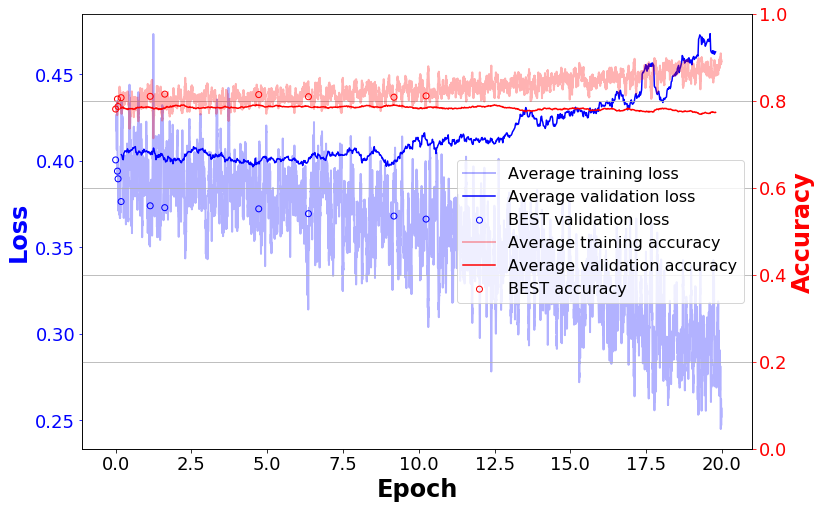

In [14]:
loc="../model_state_dumps/20190730_083439"
plot_utils.disp_learn_hist_smoothed(loc,window_train=20,window_val=20)

Now this clearly shows overtraining - validation loss starts to climb. Possibly other pathologies

## Evaluating model performance in classification task

Now let's go back to the full dataset and load the model trained last time on the full dataset

In [15]:
dset=WCH5Dataset("/fast_scratch/TRISEP_data/NUPRISM.h5",val_split=0.1,test_split=0.1,transform=rotate_chan)

In [16]:
!ls ../model_state_dumps/20190730_072940

SimpleCNN.pth  SimpleCNNBEST.pth  config_log.txt  log_train.csv  log_val.csv


In [17]:
engine=Engine(model_CNN,dset,config)

Requesting a GPU
CUDA is available
Creating a directory for run dump: ../model_state_dumps/20190730_090806/


In [18]:
engine.restore_state("../model_state_dumps/20190730_072940/SimpleCNNBEST.pth")

Restoring state from ../model_state_dumps/20190730_072940/SimpleCNNBEST.pth
Restoration complete.


In [19]:
engine.dirpath="../model_state_dumps/20190730_072940"

In [20]:
engine.validate()

val_iterations : 0
val_iterations : 1
val_iterations : 2
val_iterations : 3
val_iterations : 4
val_iterations : 5
val_iterations : 6
val_iterations : 7
val_iterations : 8
val_iterations : 9
val_iterations : 10
val_iterations : 11
val_iterations : 12
val_iterations : 13
val_iterations : 14
val_iterations : 15
val_iterations : 16
val_iterations : 17
val_iterations : 18
val_iterations : 19
val_iterations : 20
val_iterations : 21
val_iterations : 22
val_iterations : 23
val_iterations : 24
val_iterations : 25
val_iterations : 26
val_iterations : 27
val_iterations : 28
val_iterations : 29
val_iterations : 30
val_iterations : 31
val_iterations : 32
val_iterations : 33
val_iterations : 34
val_iterations : 35
val_iterations : 36
val_iterations : 37
val_iterations : 38
val_iterations : 39
val_iterations : 40
val_iterations : 41
val_iterations : 42
val_iterations : 43
val_iterations : 44
val_iterations : 45
val_iterations : 46
val_iterations : 47
val_iterations : 48
val_iterations : 49
val_iterat

### Examination of classifier output

Plot the classifier softmax output for various classes and outputs

In [21]:
labels_val=np.load(engine.dirpath + "labels.npy")
predictions_val=np.load(engine.dirpath + "predictions.npy")
softmax_out_val=np.load(engine.dirpath + "softmax.npy")

In [22]:
from matplotlib import pyplot as plt
def plot_resp(labels,softmax_out):
    fig1, ax1 = plt.subplots(figsize=(12,8),facecolor="w")
    ax1.tick_params(axis="both", labelsize=20)
    softmax_out_val_gamma_Pe=softmax_out_val[labels_val==0][:,1]
    softmax_out_val_e_Pe=softmax_out_val[labels_val==1][:,1]
    
    bins=np.linspace(0.0,1.0,51)
    values, bins, patches = ax1.hist(softmax_out_val_gamma_Pe, bins=bins, 
                                    label= 'gamma', color='blue', density=True,
                                    alpha=0.3)
    
    values, bins, patches = ax1.hist(softmax_out_val_e_Pe, bins=bins, 
                                    label= 'electron', color='red', density=True,
                                    alpha=0.3)
    ax1.legend(prop={'size': 16})
    ax1.set_xlabel('$P(e)$',fontweight='bold',fontsize=24,color='black')
    
    fig2, ax2 = plt.subplots(figsize=(12,8),facecolor="w")
    ax2.tick_params(axis="both", labelsize=20)
    softmax_out_val_e_Pmu=softmax_out_val[labels_val==1][:,2]
    softmax_out_val_mu_Pmu=softmax_out_val[labels_val==2][:,2]
    
    values, bins, patches = ax2.hist(softmax_out_val_mu_Pmu, bins=bins, 
                                    label= 'muon', color='green', density=True,
                                    alpha=0.3)
    
    values, bins, patches = ax2.hist(softmax_out_val_e_Pmu, bins=bins, 
                                    label= 'electron', color='red', density=True,
                                    alpha=0.3, log=True)
    ax2.legend(prop={'size': 16})
    ax2.set_xlabel('$P(\mu)$',fontweight='bold',fontsize=24,color='black')
    
    
    
    plt.show()

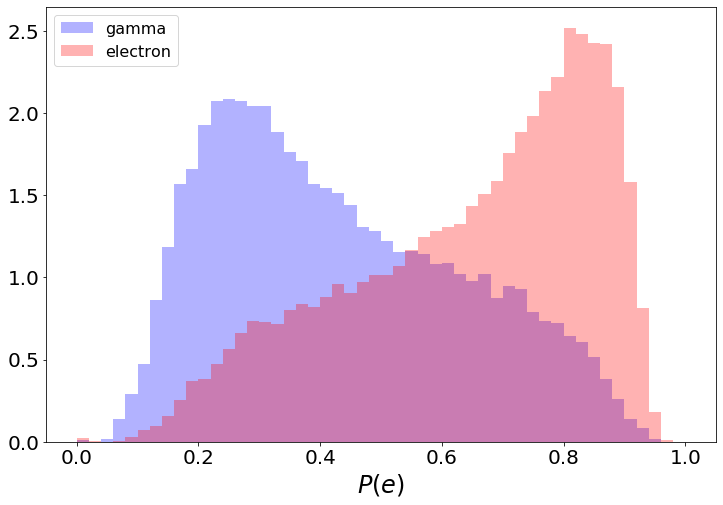

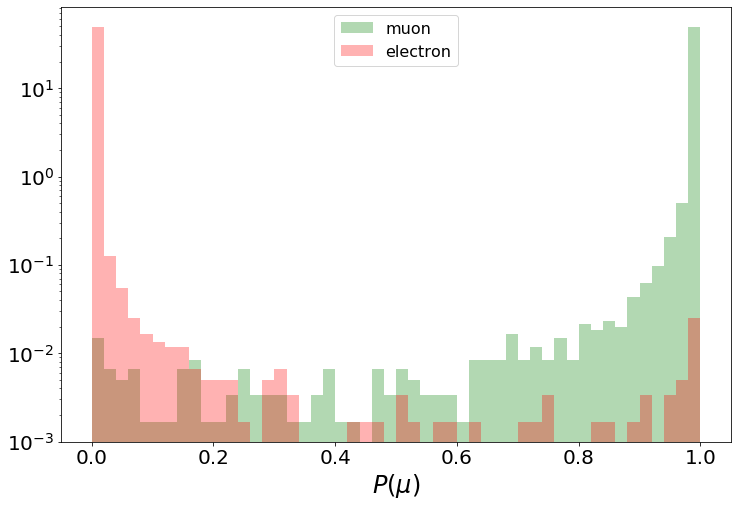

In [23]:
plot_resp(labels_val,softmax_out_val)

### The confusion matrix

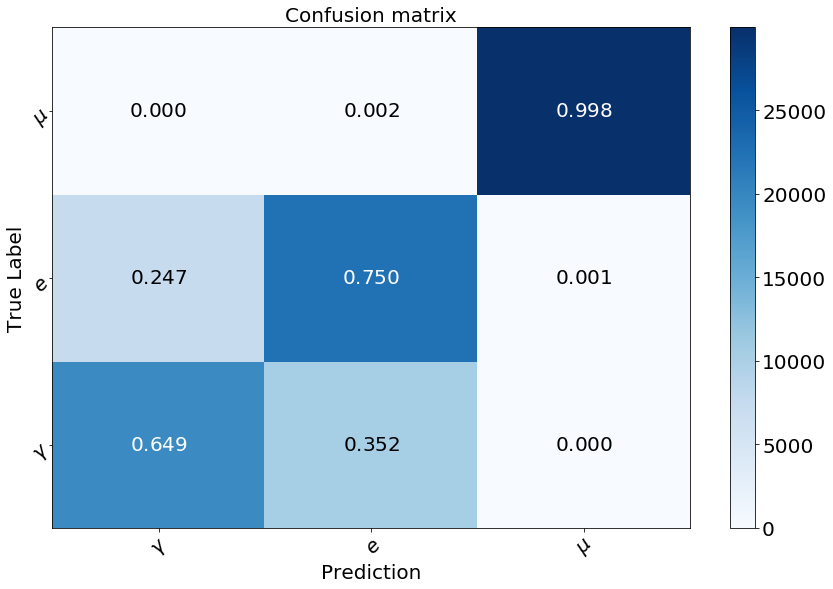

In [25]:
plot_utils.plot_confusion_matrix(labels_val, predictions_val, ['$\gamma$','$e$','$\mu$'])

### Receiver Operating Characteristic
   - We will plot ROC treating electrons as 'signal' and photons as 'background', but we have also muons - which is also a signal, so we have more reasonable possibilities of plotting ROC curves - can you name advantages and disadvantages?

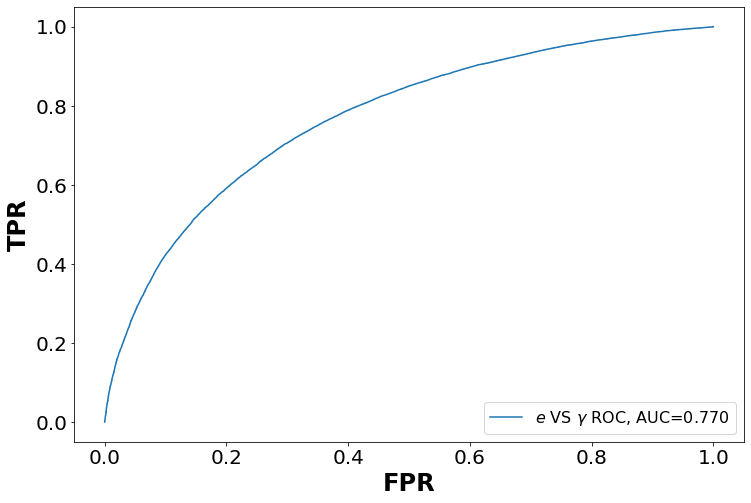

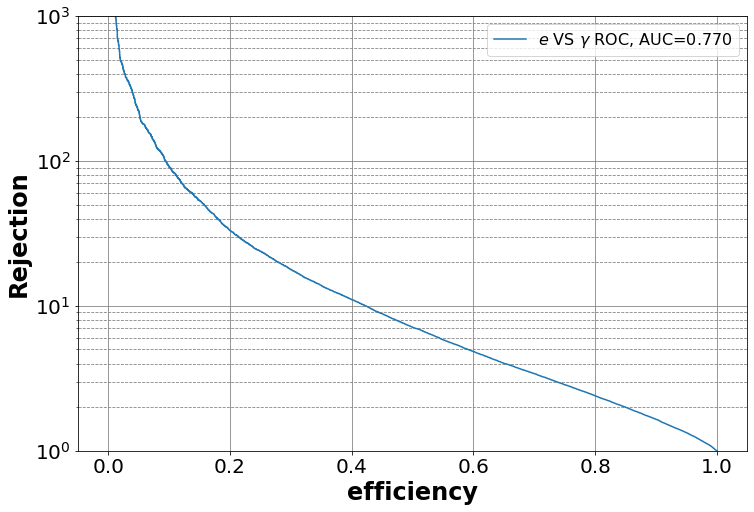

In [26]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
labels_val_e_gamma=labels_val[np.where( (labels_val==0) | (labels_val==1))]
softmax_out_val_e_gamma=softmax_out_val[np.where( (labels_val==0) | (labels_val==1))][:,1]
fpr,tpr,thr=roc_curve(labels_val_e_gamma,softmax_out_val_e_gamma)
roc_AUC=auc(fpr,tpr)
fig1, ax1 = plt.subplots(figsize=(12,8),facecolor="w")
ax1.tick_params(axis="both", labelsize=20)
ax1.plot(fpr,tpr,label=r'$e$ VS $\gamma$ ROC, AUC={:.3f}'.format(roc_AUC))
ax1.set_xlabel('FPR',fontweight='bold',fontsize=24,color='black')
ax1.set_ylabel('TPR',fontweight='bold',fontsize=24,color='black')
ax1.legend(loc="lower right",prop={'size': 16})

rejection=1.0/(fpr+1e-10)

fig2, ax2 = plt.subplots(figsize=(12,8),facecolor="w")
ax2.tick_params(axis="both", labelsize=20)
plt.yscale('log')
plt.ylim(1.0,1.0e3)
plt.grid(b=True, which='major', color='gray', linestyle='-')
plt.grid(b=True, which='minor', color='gray', linestyle='--')
ax2.plot(tpr, rejection, label=r'$e$ VS $\gamma$ ROC, AUC={:.3f}'.format(roc_AUC))
ax2.set_xlabel('efficiency',fontweight='bold',fontsize=24,color='black')
ax2.set_ylabel('Rejection',fontweight='bold',fontsize=24,color='black')
ax2.legend(loc="upper right",prop={'size': 16})

plt.show()
